## Introduction

According to Robbins & Cortan, pathological basis of disease, “Diabetes Miletus is a group of metabolic disorders sharing the common feature of hyperglycemia”. Hyperglycemia in diabetes is a result of defective insulin secretion, insulin action or both. All these metabolic dysregulations later are associated with secondary damage in multiple organ systems. 
In United State alone, diabetes is leading cause of end stage renal disease, adult-onset blindness and non-traumatic lower extremities amputation as a result of arteriopathy. 
Based on American Diabetes Association and WHO, diagnostic criteria include:
1.	Fasting plasma glucose >= 126 mg/dl
2.	Random plasma glucose >= 200 mg/dl
3.	2-hours plasma glucose >= 200 mg/dl during standard protocol
4.	Glycated hemoglobin (HbA1c) >= 6.5%


Along with this diabetes is associated with elastic hyper glycolic signs, also known as Classic Triad of Diabetes, namely polyuria, polyphagia, and polydipsia. 

According to Cleveland Clinic, polyphagia is a feeling of extreme insatiable hunger. It is a normal bodily response to situation of glycolic crisis or non-utilization of glucose by body tissues, strongly associated with diabetes miletus. 

Polydipsia is an abnormal urge to always drink fluids, which is a bodily reaction to fluid loss in forms of urine in diabetes.

Polyuria is a state of excessive urination volume which occurs when one urinates more than normal. Its association with diabetes is explained as the effect of osmolar change in urine brought about by hyperglycemia.


The data was originally collected by Professor Azad Khan from 19th September 2015 to 19th November 2015 from a group of patients at the  Outpatient Clinic of Sylhet Diabetes Hospital in  Sylhet, Bangladesh. 

    This dataset is obtained from UCI Machine Learning Inventory. Here we want to predict if there is diabetes based on the different medical parameters such as polyuria, polydipsia and many more.  
    https://archive.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import sklearn
import sys
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Python version is "+sys.version)
print("Matplotlib version is "+matplotlib.__version__)
print("Scikit-Learn version is "+sklearn.__version__)
print("Numpy version is "+np.__version__)
print("Pandas version is "+pd.__version__)

Python version is 3.9.6 (default, Aug 18 2021, 15:44:49) [MSC v.1916 64 bit (AMD64)]
Matplotlib version is 3.6.3
Scikit-Learn version is 0.24.2
Numpy version is 1.21.2
Pandas version is 1.3.2


In [2]:
df = pd.read_csv('diabetes_data_upload.csv')

In [3]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

So there are no missing data in the dataset. However there are several nominal values. 

#### Independent Variables:
    Age	: Numerical Value
    Gender: Ordinal Value
    Polyuria: Ordinal Value	
    Polydipsia: Ordinal Value
    sudden weight loss: Ordinal Value	
    weakness: Ordinal Value
    Polyphagia: Ordinal Value	
    Genital thrush: Ordinal Value
    visual blurring: Ordinal Value
    Itching: Ordinal Value
    Irritability: Ordinal Value
    delayed healing: Ordinal Value	
    partial paresis: Ordinal Value
    muscle stiffness: Ordinal Value	
    Alopecia: Ordinal Value	
    Obesity: Ordinal Value
#### Dependent Variable:
    class: Nominal Value

In [5]:
# So we are using mapping to map the values to 0 and 1 so that they can be used for 
mapping = {'Yes':1 ,'No':0}
df['Polyuria'] = df['Polyuria'].map(mapping)
df['Polydipsia'] = df['Polydipsia'].map(mapping)
df['sudden weight loss'] = df['sudden weight loss'].map(mapping)
df['weakness'] = df['weakness'].map(mapping)
df['Polyphagia'] = df['Polyphagia'].map(mapping)
df['Genital thrush'] = df['Genital thrush'].map(mapping)
df['Itching'] = df['Itching'].map(mapping)
df['Irritability'] = df['Irritability'].map(mapping)
df['delayed healing'] = df['delayed healing'].map(mapping)
df['partial paresis'] = df['partial paresis'].map(mapping)
df['muscle stiffness'] = df['muscle stiffness'].map(mapping)
df['Alopecia'] = df['Alopecia'].map(mapping)
df['Obesity'] = df['Obesity'].map(mapping)
df['visual blurring']= df['visual blurring'].map(mapping)

In [6]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0,Positive
516,48,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,0,Positive
517,58,Female,1,1,1,1,1,0,1,0,0,0,1,1,0,1,Positive
518,32,Female,0,0,0,1,0,0,1,1,0,1,0,0,1,0,Negative


In [7]:
df1 = df
gender_mapping = {'Male':0, 'Female':1}
class_mapping = {'Positive':1, 'Negative':0}
df1['Gender'] = df1['Gender'].map(gender_mapping)
df1['class'] = df1['class'].map(class_mapping)
df1

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [8]:
# Converting the variables into numpy arrays
X = df1.values
Y = df1.iloc[:,-1].values
print(X.shape)
print(Y.shape)

(520, 17)
(520,)


### Training and Testing Data


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = \
    train_test_split(X, Y, 
                     test_size=0.25,
                     stratify=Y,
                     random_state=1)

In [10]:
print(X_train.shape)
print(X_test.shape)

(390, 17)
(130, 17)


In [11]:
print(Y_test.shape)

(130,)


#### Standardizing the data

In [12]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

#### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
reg =  LogisticRegression(C=20, max_iter=22)
reg.fit(X_train, Y_train)
print("The score for training data is: ", reg.score(X_train, Y_train))
print("The score for testing data is: ", reg.score(X_test, Y_test))

The score for training data is:  0.9974358974358974
The score for testing data is:  0.9923076923076923


C:\Users\kaloa\Anaconda3\envs\hari\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator = reg,
                        X=X_train, y=Y_train, 
                        cv=5, n_jobs = -1)
print(scores)
print(scores.mean())

[0.92307692 1.         0.97435897 0.98717949 1.        ]
0.976923076923077


In [15]:
from sklearn.model_selection import cross_validate

In [16]:
scores = cross_validate(estimator = reg, X=X_train, y=Y_train, cv=5, scoring='accuracy', return_train_score=True)
print(scores)

{'fit_time': array([0.02148128, 0.0137589 , 0.00805998, 0.01638961, 0.01133657]), 'score_time': array([0.        , 0.        , 0.        , 0.00151896, 0.00219584]), 'test_score': array([0.92307692, 1.        , 0.97435897, 0.98717949, 1.        ]), 'train_score': array([0.98397436, 0.99679487, 0.99679487, 0.99358974, 0.99679487])}


C:\Users\kaloa\Anaconda3\envs\hari\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kaloa\Anaconda3\envs\hari\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

In [17]:
train_scores = scores['train_score']
print("Average training score is ", train_scores.mean())

Average training score is  0.9935897435897436


In [18]:
test_scores = scores['test_score']
print("Average testing score is ", test_scores.mean())

Average testing score is  0.976923076923077


### Confusion Matrix

In [19]:
y_pred = reg.predict(X_test) #prediction

confM = confusion_matrix(Y_test, 
                              y_pred)
print("confusion matrix:", confM, sep="\n")

confusion matrix:
[[50  0]
 [ 1 79]]


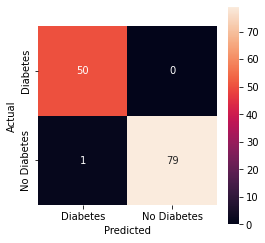

In [20]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
cm = confusion_matrix(Y_test, y_pred)
ax = sns.heatmap(cm, annot=True, square=True,
                 xticklabels=['Diabetes','No Diabetes'], 
                 yticklabels=['Diabetes','No Diabetes'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

### Support Vector Machine

In [136]:
from sklearn import svm
sv = svm.SVC(C=1e0, kernel='rbf', gamma=1e0, random_state = None, max_iter=1000)
sv.fit(X_train, Y_train)
print("The Score for training data is: ", sv.score(X_train, Y_train))
print("The score for testing data is: ", sv.score(X_test, Y_test))

The Score for training data is:  1.0
The score for testing data is:  1.0


C:\Users\kaloa\Anaconda3\envs\hari\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


### Confusion Matrix

In [137]:
y_pred = sv.predict(X_test) #prediction

confM = confusion_matrix(Y_test, 
                              y_pred)
print("confusion matrix:", confM, sep="\n")

confusion matrix:
[[50  0]
 [ 0 80]]


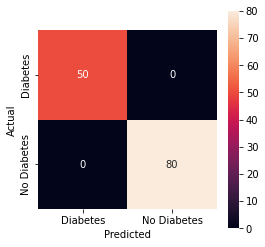

In [138]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
cm = confusion_matrix(Y_test, y_pred)
ax = sns.heatmap(cm, annot=True, square=True,
                 xticklabels=['Diabetes','No Diabetes'], 
                 yticklabels=['Diabetes','No Diabetes'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

### Multi Layer Perceptron 

In [24]:
from sklearn.neural_network import MLPClassifier
nn=MLPClassifier(hidden_layer_sizes = (70,), alpha=1e-2)
nn.fit(X_train, Y_train)
print("Score for training data is: ", nn.score(X_train, Y_train))
print("Score for testing data is: ", nn.score(X_test, Y_test))

Score for training data is:  0.9846153846153847
Score for testing data is:  0.9692307692307692


C:\Users\kaloa\Anaconda3\envs\hari\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
scores = cross_validate(estimator = nn, X=X_train, y=Y_train, cv=5, scoring='accuracy', return_train_score=True)
print(scores)

C:\Users\kaloa\Anaconda3\envs\hari\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kaloa\Anaconda3\envs\hari\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kaloa\Anaconda3\envs\hari\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kaloa\Anaconda3\envs\hari\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'fit_time': array([0.81177998, 0.82784605, 0.75780463, 0.76107883, 0.83530498]), 'score_time': array([0.00242329, 0.00100517, 0.00204968, 0.00199938, 0.00100136]), 'test_score': array([0.93589744, 1.        , 0.97435897, 0.98717949, 0.98717949]), 'train_score': array([0.99038462, 0.99358974, 0.98717949, 0.98397436, 0.99038462])}


C:\Users\kaloa\Anaconda3\envs\hari\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
print(scores)
print(scores.mean())

{'fit_time': array([0.81177998, 0.82784605, 0.75780463, 0.76107883, 0.83530498]), 'score_time': array([0.00242329, 0.00100517, 0.00204968, 0.00199938, 0.00100136]), 'test_score': array([0.93589744, 1.        , 0.97435897, 0.98717949, 0.98717949]), 'train_score': array([0.99038462, 0.99358974, 0.98717949, 0.98397436, 0.99038462])}


AttributeError: 'dict' object has no attribute 'mean'

### Confusion Matrix

In [27]:
y_pred = nn.predict(X_test) #prediction

cm = confusion_matrix(Y_test, 
                              y_pred)
print("confusion matrix:", cm, sep="\n")

confusion matrix:
[[49  1]
 [ 3 77]]


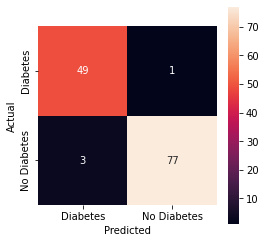

In [28]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
cm = confusion_matrix(Y_test, y_pred)
ax = sns.heatmap(cm, annot=True, square=True,
                 xticklabels=['Diabetes','No Diabetes'], 
                 yticklabels=['Diabetes','No Diabetes'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

### Grid Search using SVC

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
C_range = np.logspace(-2, 4, 7)
gamma_range = np.logspace(-4, 2, 7)
print(gamma_range)

[1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


In [31]:
param_grid = [{'C': C_range, 'kernel': ['linear']},
    {'C': C_range, 'degree':[2,3,4], 'kernel':['poly']},
    {'C': C_range, 
    'gamma': gamma_range, 
    'kernel': ['rbf']}]

### Accuracy

In [32]:
svc = svm.SVC()
gs = GridSearchCV(estimator=svc, 
    param_grid=param_grid, 
    scoring='accuracy', 
    cv=5,
    n_jobs=-1)

In [33]:
gs.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
                          'kernel': ['linear']},
                         {'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
                          'degree': [2, 3, 4], 'kernel': ['poly']},
                         {'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
                          'gamma': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [34]:
print(gs.best_estimator_)
print(gs.best_score_)

SVC(C=0.1, kernel='linear')
1.0


In [35]:
estimator = gs.best_estimator_.fit(X_train, Y_train)

In [36]:
print("Best training score:", gs.best_estimator_.score(X_train, Y_train))
print("Best hyper-parameters :", gs.best_params_)
print("Best test score: ", gs.best_estimator_.score(X_test, Y_test))

Best training score: 1.0
Best hyper-parameters : {'C': 0.1, 'kernel': 'linear'}
Best test score:  1.0


Testing data  for confusion matrix

In [37]:
y_pred = gs.predict(X_test) #prediction

cm = confusion_matrix(Y_test, 
                              y_pred)
print("confusion matrix:", cm, sep="\n")

confusion matrix:
[[50  0]
 [ 0 80]]


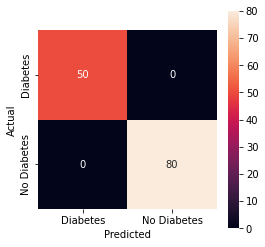

In [38]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
cm = confusion_matrix(Y_test, y_pred)
ax = sns.heatmap(cm, annot=True, square=True,
                 xticklabels=['Diabetes','No Diabetes'], 
                 yticklabels=['Diabetes','No Diabetes'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

Training Data for Confusion Matrix

In [39]:
y_pred = gs.predict(X_train) #prediction
cm = confusion_matrix(Y_train, 
                              y_pred)
print("confusion matrix:", cm, sep="\n")

confusion matrix:
[[150   0]
 [  0 240]]


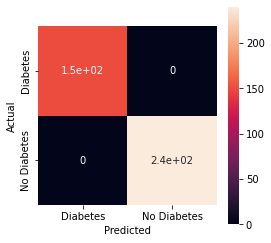

In [40]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
cm = confusion_matrix(Y_train, y_pred)
ax = sns.heatmap(cm, annot=True, square=True,
                 xticklabels=['Diabetes','No Diabetes'], 
                 yticklabels=['Diabetes','No Diabetes'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

### Precision Score

In [41]:
svc = svm.SVC()
gs1 = GridSearchCV(estimator=svc, 
    param_grid=param_grid, 
    scoring='precision', 
    cv=5,
    n_jobs=-1)

In [42]:
gs1.fit(X_train, Y_train)
print(gs1.best_estimator_)
print(gs1.best_score_)

SVC(C=0.01, kernel='linear')
1.0


In [43]:
estimator = gs1.best_estimator_.fit(X_train, Y_train)

In [44]:
print("Best training score:", gs1.best_estimator_.score(X_train, Y_train))
print("Best hyper-parameters :", gs1.best_params_)
print("Best test score: ", gs1.best_estimator_.score(X_test, Y_test))

Best training score: 1.0
Best hyper-parameters : {'C': 0.01, 'kernel': 'linear'}
Best test score:  1.0


Testing Data Confusion Matrix

In [45]:
y_pred = gs1.predict(X_test) #prediction

cm = confusion_matrix(Y_test, 
                              y_pred)
print("confusion matrix:", cm, sep="\n")


confusion matrix:
[[50  0]
 [ 0 80]]


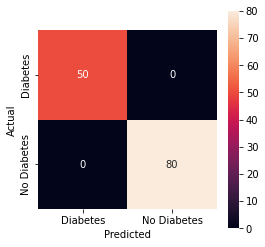

In [46]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
cm = confusion_matrix(Y_test, y_pred)
ax = sns.heatmap(cm, annot=True, square=True,
                 xticklabels=['Diabetes','No Diabetes'], 
                 yticklabels=['Diabetes','No Diabetes'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

Training Data Confusion Matrix

confusion matrix:
[[150   0]
 [  0 240]]


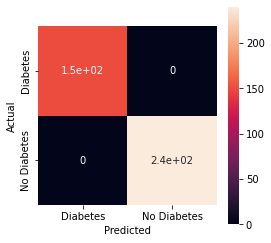

In [47]:
y_pred = gs1.predict(X_train) #prediction
cm = confusion_matrix(Y_train, 
                              y_pred)
print("confusion matrix:", cm, sep="\n")

fig, ax = plt.subplots(1,1,figsize=(4,4))
cm = confusion_matrix(Y_train, y_pred)
ax = sns.heatmap(cm, annot=True, square=True,
                 xticklabels=['Diabetes','No Diabetes'], 
                 yticklabels=['Diabetes','No Diabetes'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

## Recall Score

In [48]:
svc = svm.SVC()
gs = GridSearchCV(estimator=svc, 
    param_grid=param_grid, 
    scoring='recall', 
    cv=5,
    n_jobs=-1)

In [49]:
gs.fit(X_train, Y_train)
print(gs.best_estimator_)
print(gs.best_score_)

SVC(C=0.1, kernel='linear')
1.0


In [50]:
estimator = gs.best_estimator_.fit(X_train, Y_train)

In [51]:
print("Best training score:", gs.best_estimator_.score(X_train, Y_train))
print("Best hyper-parameters :", gs.best_params_)
print("Best test score: ", gs.best_estimator_.score(X_test, Y_test))

Best training score: 1.0
Best hyper-parameters : {'C': 0.1, 'kernel': 'linear'}
Best test score:  1.0


Training Data Confusion Matrix

confusion matrix:
[[150   0]
 [  0 240]]


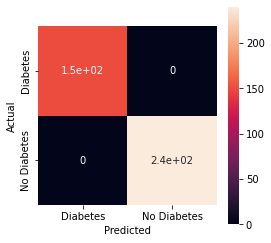

In [52]:
y_pred = gs.predict(X_train) #prediction
cm = confusion_matrix(Y_train, 
                              y_pred)
print("confusion matrix:", cm, sep="\n")

fig, ax = plt.subplots(1,1,figsize=(4,4))
cm = confusion_matrix(Y_train, y_pred)
ax = sns.heatmap(cm, annot=True, square=True,
                 xticklabels=['Diabetes','No Diabetes'], 
                 yticklabels=['Diabetes','No Diabetes'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

Testing Data Confusion Matrix

confusion matrix:
[[50  0]
 [ 0 80]]


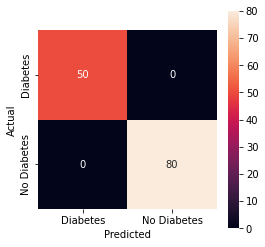

In [53]:
y_pred = gs.predict(X_test) #prediction
cm = confusion_matrix(Y_test, 
                              y_pred)
print("confusion matrix:", cm, sep="\n")

fig, ax = plt.subplots(1,1,figsize=(4,4))
cm = confusion_matrix(Y_test, y_pred)
ax = sns.heatmap(cm, annot=True, square=True,
                 xticklabels=['Diabetes','No Diabetes'], 
                 yticklabels=['Diabetes','No Diabetes'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

### F1 Score

In [54]:
svc = svm.SVC()
gs = GridSearchCV(estimator=svc, 
    param_grid=param_grid, 
    scoring='f1', 
    cv=7,
    n_jobs=-1)

In [55]:
gs.fit(X_train, Y_train)
print(gs.best_estimator_)
print(gs.best_score_)

SVC(C=0.1, kernel='linear')
1.0


In [56]:
estimator = gs.best_estimator_.fit(X_train, Y_train)

In [57]:
print("Best training score:", gs.best_estimator_.score(X_train, Y_train))
print("Best hyper-parameters :", gs.best_params_)
print("Best test score: ", gs.best_estimator_.score(X_test, Y_test))

Best training score: 1.0
Best hyper-parameters : {'C': 0.1, 'kernel': 'linear'}
Best test score:  1.0


Training Data Confusion Matrix

confusion matrix:
[[150   0]
 [  0 240]]


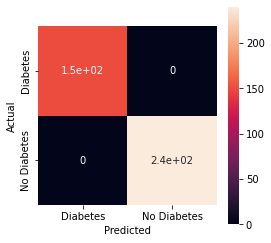

In [58]:
y_pred = gs.predict(X_train) #prediction
cm = confusion_matrix(Y_train, 
                              y_pred)
print("confusion matrix:", cm, sep="\n")

fig, ax = plt.subplots(1,1,figsize=(4,4))
cm = confusion_matrix(Y_train, y_pred)
ax = sns.heatmap(cm, annot=True, square=True,
                 xticklabels=['Diabetes','No Diabetes'], 
                 yticklabels=['Diabetes','No Diabetes'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

Testing Data Confusion Matrix

confusion matrix:
[[50  0]
 [ 0 80]]


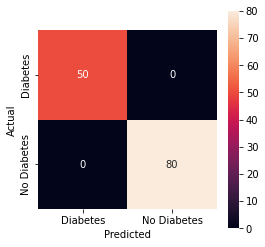

In [59]:
y_pred = gs.predict(X_test) #prediction
cm = confusion_matrix(Y_test, 
                              y_pred)
print("confusion matrix:", cm, sep="\n")

fig, ax = plt.subplots(1,1,figsize=(4,4))
cm = confusion_matrix(Y_test, y_pred)
ax = sns.heatmap(cm, annot=True, square=True,
                 xticklabels=['Diabetes','No Diabetes'], 
                 yticklabels=['Diabetes','No Diabetes'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

# Logistic Regression GridSearch

In [96]:
reg= LogisticRegression()
param_grid = [{'solver':['lbfgs', 'liblinear', 'saga'], 'multi_class':['auto'], 'C':C_range, 'penalty':['l1', 'l2'], 'class_weight':[{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]}]
gs = GridSearchCV(estimator=reg, 
    param_grid=param_grid, 
    scoring='accuracy', 
    cv=5,
    n_jobs=-1)
print(param_grid)

[{'solver': ['lbfgs', 'liblinear', 'saga'], 'multi_class': ['auto'], 'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]), 'penalty': ['l1', 'l2'], 'class_weight': [{1: 0.5, 0: 0.5}, {1: 0.4, 0: 0.6}, {1: 0.6, 0: 0.4}, {1: 0.7, 0: 0.3}]}]


In [97]:
gs.fit(X_train, Y_train)
print(gs.best_estimator_)
print(gs.best_score_)

LogisticRegression(C=0.1, class_weight={0: 0.5, 1: 0.5}, penalty='l1',
                   solver='liblinear')
1.0


C:\Users\kaloa\Anaconda3\envs\hari\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.61538462 0.61538462 0.82307692 0.7974359  0.77948718
        nan 0.61538462 0.61538462 0.91282051 0.97692308 0.97692308
        nan 0.61538462 0.61538462 0.62051282 0.61538462 0.61538462
        nan 0.61538462 0.61538462 0.61538462 0.61538462 0.61538462
        nan 1.         0.93589744 0.99230769 0.99230769 0.97179487
        nan 1.         0.99487179 0.99487179 0.97435897 0.96666667
        nan 1.         0.61538462 0.98461538 0.98717949 0.83846154
        nan 1.         0.61538462 0.95641026 0.96666667 0.61538462
        nan 1.         0.98461538 1.         1.         0.98205128
        nan 1.         0.96923077 1.         1.         0.96666667
        nan 1.         0.88205128 1.         1.         0.88717949
        nan 1.         0.61794872 1.         0.9974359  0.65384615
        nan 1.         0.98205128 1.       

In [98]:
print('Training set score:', gs.best_estimator_.score(X_train, Y_train))
print("Best hyper-parameters :", gs.best_params_)
print('Test set score: ', gs.best_estimator_.score(X_test, Y_test))

Training set score: 1.0
Best hyper-parameters : {'C': 0.1, 'class_weight': {1: 0.5, 0: 0.5}, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}
Test set score:  1.0


Testing Data Confusion Matrix

confusion matrix:
[[50  0]
 [ 0 80]]


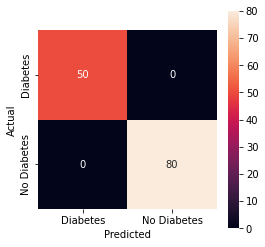

In [99]:
y_pred = gs.predict(X_test) #prediction
cm = confusion_matrix(Y_test, 
                              y_pred)
print("confusion matrix:", cm, sep="\n")

fig, ax = plt.subplots(1,1,figsize=(4,4))
cm = confusion_matrix(Y_test, y_pred)
ax = sns.heatmap(cm, annot=True, square=True,
                 xticklabels=['Diabetes','No Diabetes'], 
                 yticklabels=['Diabetes','No Diabetes'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

Training Data Confusion Matrix

confusion matrix:
[[150   0]
 [  0 240]]


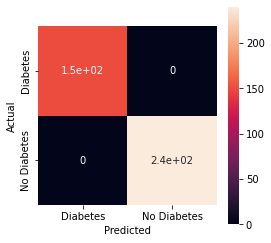

In [100]:
y_pred = gs.predict(X_train) #prediction
cm = confusion_matrix(Y_train, 
                              y_pred)
print("confusion matrix:", cm, sep="\n")

fig, ax = plt.subplots(1,1,figsize=(4,4))
cm = confusion_matrix(Y_train, y_pred)
ax = sns.heatmap(cm, annot=True, square=True,
                 xticklabels=['Diabetes','No Diabetes'], 
                 yticklabels=['Diabetes','No Diabetes'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

## Precision Score

In [101]:
reg= LogisticRegression()
param_grid = [{'solver':['lbfgs', 'liblinear', 'saga'], 'multi_class':['auto'], 'C':C_range, 'penalty':['l1', 'l2'], 'class_weight':[{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]}]
gs = GridSearchCV(estimator=reg, 
    param_grid=param_grid, 
    scoring='precision', 
    cv=5,
    n_jobs=-1)
print(param_grid)

[{'solver': ['lbfgs', 'liblinear', 'saga'], 'multi_class': ['auto'], 'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]), 'penalty': ['l1', 'l2'], 'class_weight': [{1: 0.5, 0: 0.5}, {1: 0.4, 0: 0.6}, {1: 0.6, 0: 0.4}, {1: 0.7, 0: 0.3}]}]


In [102]:
gs.fit(X_train, Y_train)
print(gs.best_estimator_)
print(gs.best_score_)

LogisticRegression(C=0.1, class_weight={0: 0.5, 1: 0.5}, penalty='l1',
                   solver='liblinear')
1.0


C:\Users\kaloa\Anaconda3\envs\hari\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.61538462 0.61538462 0.78200625 0.75506148 0.73786856
        nan 0.61538462 0.61538462 0.9517498  0.98791837 0.98791837
        nan 0.61538462 0.61538462 0.61862348 0.61538462 0.61538462
        nan 0.61538462 0.61538462 0.61538462 0.61538462 0.61538462
        nan 1.         0.9103363  0.99591837 0.98791837 0.95668741
        nan 1.         0.99183673 1.         0.98791837 0.98783333
        nan 1.         0.61538462 0.97615366 0.97991837 0.79587885
        nan 1.         0.61538462 0.9347979  0.9494394  0.61538462
        nan 1.         0.97583673 1.         1.         0.9717551
        nan 1.         0.98783333 1.         1.         0.98783333
        nan 1.         0.8415612  1.         1.         0.84698493
        nan 1.         0.61858142 1.         0.99591837 0.64013843
        nan 1.         0.9717551  1.        

In [103]:
estimator = gs.best_estimator_.fit(X_train,Y_train)

In [104]:
print('Training set score:', gs.best_estimator_.score(X_train, Y_train))
print("Best hyper-parameters :", gs.best_params_)
print('Test set score: ', gs.best_estimator_.score(X_test, Y_test))

Training set score: 1.0
Best hyper-parameters : {'C': 0.1, 'class_weight': {1: 0.5, 0: 0.5}, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}
Test set score:  1.0


Testing Data Confusion Matrix

confusion matrix:
[[50  0]
 [ 0 80]]


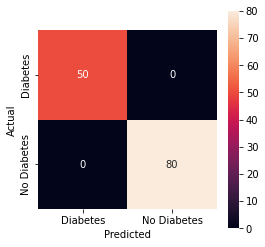

In [105]:
y_pred = gs.predict(X_test) #prediction
cm = confusion_matrix(Y_test, 
                              y_pred)
print("confusion matrix:", cm, sep="\n")

fig, ax = plt.subplots(1,1,figsize=(4,4))
cm = confusion_matrix(Y_test, y_pred)
ax = sns.heatmap(cm, annot=True, square=True,
                 xticklabels=['Diabetes','No Diabetes'], 
                 yticklabels=['Diabetes','No Diabetes'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

Training Data Confusion Matrix

confusion matrix:
[[150   0]
 [  0 240]]


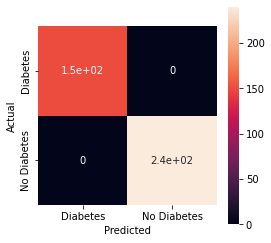

In [106]:
y_pred = gs.predict(X_train) #prediction
cm = confusion_matrix(Y_train, 
                              y_pred)
print("confusion matrix:", cm, sep="\n")

fig, ax = plt.subplots(1,1,figsize=(4,4))
cm = confusion_matrix(Y_train, y_pred)
ax = sns.heatmap(cm, annot=True, square=True,
                 xticklabels=['Diabetes','No Diabetes'], 
                 yticklabels=['Diabetes','No Diabetes'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

## Recall Score

In [107]:
rec = LogisticRegression()
param_grid = [{'solver':['lbfgs', 'liblinear', 'saga'], 'multi_class':['auto'], 'C':C_range, 'penalty':['l1', 'l2'], 'class_weight':[{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]}]
gs = GridSearchCV(estimator=rec, 
    param_grid=param_grid, 
    scoring='recall', 
    cv=5,
    n_jobs=-1)

In [108]:
gs.fit(X_train, Y_train)
print(gs.best_estimator_)
print(gs.best_score_)

LogisticRegression(C=0.01, class_weight={0: 0.5, 1: 0.5}, penalty='l1',
                   solver='liblinear')
1.0


C:\Users\kaloa\Anaconda3\envs\hari\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 1.         1.         0.99166667 1.         1.
        nan 1.         1.         0.90416667 0.975      0.975
        nan 1.         1.         1.         1.         1.
        nan 1.         1.         1.         1.         1.
        nan 1.         1.         0.99166667 1.         1.
        nan 1.         1.         0.99166667 0.97083333 0.95833333
        nan 1.         1.         1.         1.         1.
        nan 1.         1.         1.         1.         1.
        nan 1.         1.         1.         1.         1.
        nan 1.         0.9625     1.         1.         0.95833333
        nan 1.         1.         1.         1.         1.
        nan 1.         1.         1.         1.         1.
        nan 1.         1.         1.         1.         1.
        nan 1.         0.95833333 1.         1.         0.958

In [109]:
estimator = gs.best_estimator_.fit(X_train,Y_train)

In [110]:
print('Training set score:', gs.best_estimator_.score(X_train, Y_train))
print("Best hyper-parameters :", gs.best_params_)
print('Test set score: ', gs.best_estimator_.score(X_test, Y_test))

Training set score: 0.6153846153846154
Best hyper-parameters : {'C': 0.01, 'class_weight': {1: 0.5, 0: 0.5}, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}
Test set score:  0.6153846153846154


Testing Data CM

confusion matrix:
[[ 0 50]
 [ 0 80]]


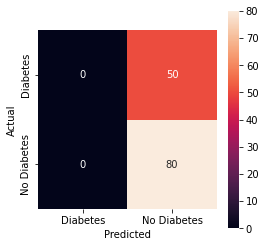

In [75]:
y_pred = gs.predict(X_test) #prediction
cm = confusion_matrix(Y_test, 
                              y_pred)
print("confusion matrix:", cm, sep="\n")

fig, ax = plt.subplots(1,1,figsize=(4,4))
cm = confusion_matrix(Y_test, y_pred)
ax = sns.heatmap(cm, annot=True, square=True,
                 xticklabels=['Diabetes','No Diabetes'], 
                 yticklabels=['Diabetes','No Diabetes'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

Training Data CM

confusion matrix:
[[  0 150]
 [  0 240]]


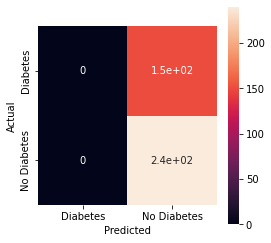

In [76]:
y_pred = gs.predict(X_train) #prediction
cm = confusion_matrix(Y_train, 
                              y_pred)
print("confusion matrix:", cm, sep="\n")

fig, ax = plt.subplots(1,1,figsize=(4,4))
cm = confusion_matrix(Y_train, y_pred)
ax = sns.heatmap(cm, annot=True, square=True,
                 xticklabels=['Diabetes','No Diabetes'], 
                 yticklabels=['Diabetes','No Diabetes'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

## F1 Score

In [77]:
f1 = LogisticRegression()
param_grid = [{'solver':['lbfgs', 'liblinear', 'saga'], 'multi_class':['auto'], 'C':C_range, 'penalty':['l1', 'l2'], 'class_weight':[{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]}]
gs = GridSearchCV(estimator=f1, 
    param_grid=param_grid, 
    scoring='f1', 
    cv=5,
    n_jobs=-1)

In [78]:
gs.fit(X_train, Y_train)
print(gs.best_estimator_)
print(gs.best_score_)

LogisticRegression(C=0.1, class_weight={0: 0.5, 1: 0.5}, penalty='l1',
                   solver='liblinear')
1.0


C:\Users\kaloa\Anaconda3\envs\hari\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.76190476 0.76190476 0.87397106 0.85965466 0.84868649
        nan 0.76190476 0.76190476 0.92704847 0.98052318 0.98052318
        nan 0.76190476 0.76190476 0.76436252 0.76190476 0.76190476
        nan 0.76190476 0.76190476 0.76190476 0.76190476 0.76190476
        nan 1.         0.95075714 0.99368283 0.99385651 0.97773405
        nan 1.         0.99587629 0.99574468 0.97841792 0.97205779
        nan 1.         0.76190476 0.98779591 0.98977488 0.88524821
        nan 1.         0.76190476 0.96605453 0.97385409 0.76190476
        nan 1.         0.98771302 1.         1.         0.98565117
        nan 1.         0.97420784 1.         1.         0.97205779
        nan 1.         0.91330302 1.         1.         0.91662596
        nan 1.         0.76312381 1.         0.99793814 0.78055023
        nan 1.         0.98565117 1.       

In [79]:
estimator = gs.best_estimator_.fit(X_train,Y_train)

In [80]:
print('Training set score:', gs.best_estimator_.score(X_train, Y_train))
print("Best hyper-parameters :", gs.best_params_)
print('Test set score: ', gs.best_estimator_.score(X_test, Y_test))

Training set score: 1.0
Best hyper-parameters : {'C': 0.1, 'class_weight': {1: 0.5, 0: 0.5}, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}
Test set score:  1.0


confusion matrix:
[[50  0]
 [ 0 80]]


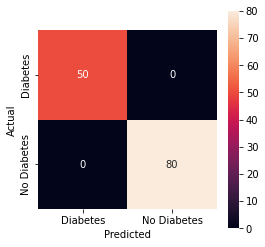

In [81]:
y_pred = gs.predict(X_test) #prediction
cm = confusion_matrix(Y_test, 
                              y_pred)
print("confusion matrix:", cm, sep="\n")

fig, ax = plt.subplots(1,1,figsize=(4,4))
cm = confusion_matrix(Y_test, y_pred)
ax = sns.heatmap(cm, annot=True, square=True,
                 xticklabels=['Diabetes','No Diabetes'], 
                 yticklabels=['Diabetes','No Diabetes'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

confusion matrix:
[[150   0]
 [  0 240]]


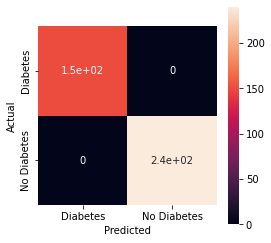

In [82]:
y_pred = gs.predict(X_train) #prediction
cm = confusion_matrix(Y_train, 
                              y_pred)
print("confusion matrix:", cm, sep="\n")

fig, ax = plt.subplots(1,1,figsize=(4,4))
cm = confusion_matrix(Y_train, y_pred)
ax = sns.heatmap(cm, annot=True, square=True,
                 xticklabels=['Diabetes','No Diabetes'], 
                 yticklabels=['Diabetes','No Diabetes'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

# MLP Grid Search

In [129]:
alpha_range = np.logspace(-2, 3, 6)
hidden_layer_sizes = []
for i in range(6, 20, 2):
    hidden_layer_sizes.append((i,)) 
    for j in range(i, 6, -4):
        hidden_layer_sizes.append((i,j))
param_grid = [{'alpha': alpha_range, 
               'hidden_layer_sizes': hidden_layer_sizes} ]

print(param_grid)

[{'alpha': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'hidden_layer_sizes': [(6,), (8,), (8, 8), (10,), (10, 10), (12,), (12, 12), (12, 8), (14,), (14, 14), (14, 10), (16,), (16, 16), (16, 12), (16, 8), (18,), (18, 18), (18, 14), (18, 10)]}]


In [130]:
## Accuracy 

In [131]:
mlp = MLPClassifier(learning_rate_init=0.05, max_iter=1000)
gs = GridSearchCV(estimator=mlp, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=5)
gs = gs.fit(X_train, Y_train)

In [139]:
print(gs.best_estimator_)
print(gs.best_score_)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(18,), learning_rate_init=0.05,
              max_iter=1000)
1.0


In [140]:
print('Training set score:', gs.best_estimator_.score(X_train, Y_train))
print("Best hyper-parameters :", gs.best_params_)
print("Test score = ", gs.score(X_test, Y_test))

Training set score: 1.0
Best hyper-parameters : {'alpha': 0.01, 'hidden_layer_sizes': (18,)}
Test score =  1.0


Testing Data Confusion Matrix

In [141]:
y_pred = gs.predict(X_test) #prediction

cmat = confusion_matrix(Y_test, 
                              y_pred)
print("confusion matrix:", cmat, sep="\n")

confusion matrix:
[[50  0]
 [ 0 80]]


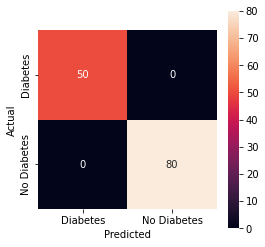

In [142]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax = sns.heatmap(cmat, annot=True, square=True,
                 xticklabels=['Diabetes','No Diabetes'], 
                 yticklabels=['Diabetes','No Diabetes'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

Training Data Confusion Matrix

confusion matrix:
[[150   0]
 [  0 240]]


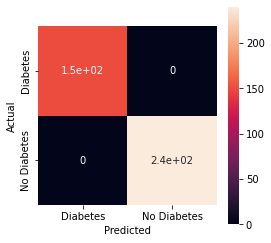

In [143]:
y_pred = gs.predict(X_train) #prediction
cmat = confusion_matrix(Y_train, 
                              y_pred)
print("confusion matrix:", cmat, sep="\n")

fig, ax = plt.subplots(1,1,figsize=(4,4))
cm = confusion_matrix(Y_train, y_pred)
ax = sns.heatmap(cm, annot=True, square=True,
                 xticklabels=['Diabetes','No Diabetes'], 
                 yticklabels=['Diabetes','No Diabetes'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');


## Precision Score

In [144]:
mnp = MLPClassifier(learning_rate_init=0.05, max_iter=1000)
gs = GridSearchCV(estimator=mnp, 
                  param_grid=param_grid, 
                  scoring='precision', 
                  cv=5)

In [94]:
gs = gs.fit(X_train, Y_train)
print(gs.best_estimator_)
print(gs.best_score_)

C:\Users\kaloa\Anaconda3\envs\hari\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kaloa\Anaconda3\envs\hari\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kaloa\Anaconda3\envs\hari\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kaloa\Anaconda3\envs\hari\lib\site-packages\sklearn\metrics\_classification.py:

MLPClassifier(alpha=0.01, hidden_layer_sizes=(9,), learning_rate_init=0.05,
              max_iter=1000)
1.0


In [111]:
print('Training set score:', gs.best_estimator_.score(X_train, Y_train))
print("Best hyper-parameters :", gs.best_params_)
print("Test score = ", gs.score(X_test, Y_test))

Training set score: 0.6153846153846154
Best hyper-parameters : {'C': 0.01, 'class_weight': {1: 0.5, 0: 0.5}, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}
Test score =  1.0


Training Data Confusion Matrix

confusion matrix:
[[  0 150]
 [  0 240]]


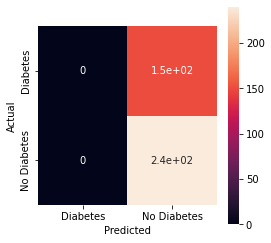

In [112]:
y_pred = gs.predict(X_train) #prediction
cmat = confusion_matrix(Y_train, 
                              y_pred)
print("confusion matrix:", cmat, sep="\n")

fig, ax = plt.subplots(1,1,figsize=(4,4))
cm = confusion_matrix(Y_train, y_pred)
ax = sns.heatmap(cm, annot=True, square=True,
                 xticklabels=['Diabetes','No Diabetes'], 
                 yticklabels=['Diabetes','No Diabetes'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');


Testing Data Confusion Matrix

confusion matrix:
[[ 0 50]
 [ 0 80]]


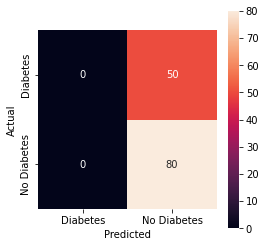

In [113]:
y_pred = gs.predict(X_test) #prediction
cmat = confusion_matrix(Y_test, 
                              y_pred)
print("confusion matrix:", cmat, sep="\n")

fig, ax = plt.subplots(1,1,figsize=(4,4))
cm = confusion_matrix(Y_test, y_pred)
ax = sns.heatmap(cm, annot=True, square=True,
                 xticklabels=['Diabetes','No Diabetes'], 
                 yticklabels=['Diabetes','No Diabetes'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');


## Recall Score

In [145]:
mrp = MLPClassifier(learning_rate_init=0.05, max_iter=1000, warm_start=True)
gs = GridSearchCV(estimator=mrp, 
                  param_grid=param_grid, 
                  scoring='recall', 
                  cv=5)
mrp.get_params().keys()

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [146]:
gs = gs.fit(X_train, Y_train)
print(gs.best_estimator_)
print(gs.best_score_)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(6,), learning_rate_init=0.05,
              max_iter=1000, warm_start=True)
1.0


In [147]:
print('Training set score:', gs.best_estimator_.score(X_train, Y_train))
print("Best hyper-parameters :", gs.best_params_)
print("Test score = ", gs.score(X_test, Y_test))

Training set score: 1.0
Best hyper-parameters : {'alpha': 0.01, 'hidden_layer_sizes': (6,)}
Test score =  1.0


Training Data CM

confusion matrix:
[[150   0]
 [  0 240]]


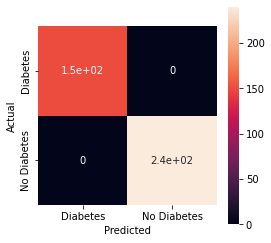

In [148]:
y_pred = gs.predict(X_train) #prediction
cmat = confusion_matrix(Y_train, 
                              y_pred)
print("confusion matrix:", cmat, sep="\n")

fig, ax = plt.subplots(1,1,figsize=(4,4))
cm = confusion_matrix(Y_train, y_pred)
ax = sns.heatmap(cm, annot=True, square=True,
                 xticklabels=['Diabetes','No Diabetes'], 
                 yticklabels=['Diabetes','No Diabetes'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

Testing Data CM


confusion matrix:
[[50  0]
 [ 0 80]]


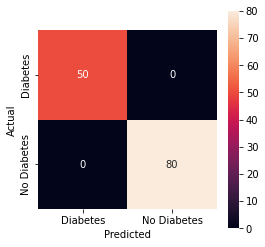

In [149]:
y_pred = gs.predict(X_test) #prediction
cmat = confusion_matrix(Y_test, 
                              y_pred)
print("confusion matrix:", cmat, sep="\n")

fig, ax = plt.subplots(1,1,figsize=(4,4))
cm = confusion_matrix(Y_test, y_pred)
ax = sns.heatmap(cm, annot=True, square=True,
                 xticklabels=['Diabetes','No Diabetes'], 
                 yticklabels=['Diabetes','No Diabetes'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');


## F1 Score

In [150]:
nf1 = MLPClassifier(learning_rate_init=0.05, max_iter=1000)
gs = GridSearchCV(estimator=nf1, 
                  param_grid=param_grid, 
                  scoring='f1', 
                  cv=5)

In [151]:
gs = gs.fit(X_train, Y_train)
print(gs.best_estimator_)
print(gs.best_score_)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(16,), learning_rate_init=0.05,
              max_iter=1000)
1.0


In [152]:
print('Training set score:', gs.best_estimator_.score(X_train, Y_train))
print("Best hyper-parameters :", gs.best_params_)
print("Test score = ", gs.score(X_test, Y_test))

Training set score: 1.0
Best hyper-parameters : {'alpha': 0.01, 'hidden_layer_sizes': (16,)}
Test score =  1.0


Training Data CM

confusion matrix:
[[150   0]
 [  0 240]]


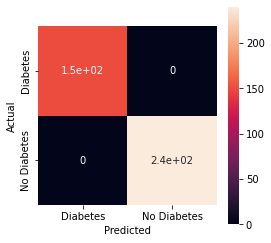

In [153]:
y_pred = gs.predict(X_train) #prediction
cmat = confusion_matrix(Y_train, 
                              y_pred)
print("confusion matrix:", cmat, sep="\n")

fig, ax = plt.subplots(1,1,figsize=(4,4))
cm = confusion_matrix(Y_train, y_pred)
ax = sns.heatmap(cm, annot=True, square=True,
                 xticklabels=['Diabetes','No Diabetes'], 
                 yticklabels=['Diabetes','No Diabetes'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

Testing Data CM

confusion matrix:
[[50  0]
 [ 0 80]]


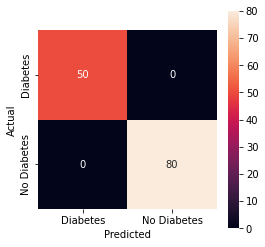

In [154]:
y_pred = gs.predict(X_test) #prediction
cmat = confusion_matrix(Y_test, 
                              y_pred)
print("confusion matrix:", cmat, sep="\n")

fig, ax = plt.subplots(1,1,figsize=(4,4))
cm = confusion_matrix(Y_test, y_pred)
ax = sns.heatmap(cm, annot=True, square=True,
                 xticklabels=['Diabetes','No Diabetes'], 
                 yticklabels=['Diabetes','No Diabetes'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');